In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
Nx, Ny = 256, 256
dt, tfinal = 1e-3, 1.17
n_timesteps = int(np.floor(tfinal/dt))

dx = 2*np.pi/Nx
dy = 2*np.pi/Ny

xx = np.arange(0, Nx)*dx
yy = np.arange(0, Ny)*dy

kx = np.ones((1, Ny)).T * (np.arange(-Nx/2, Nx/2))
ky = np.reshape(np.arange(-Ny/2, Ny/2), (1, Ny)).T * np.ones((1, Nx))

k2 = kx**2+ky**2
k2[int(Nx/2),int(Nx/2)]=1

In [82]:
dealias = (np.abs(kx) < (2.0/3.0)*(Nx/2.0)) * (np.abs(ky)<(2.0/3.0)*(Ny/2.0))

Time: 0.0s


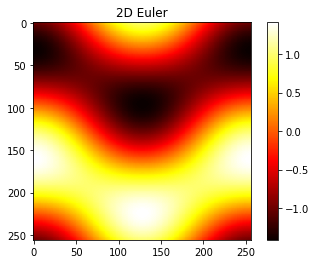

Time: 0.01s


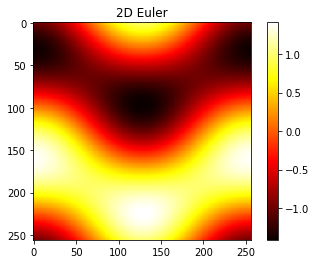

Time: 0.02s


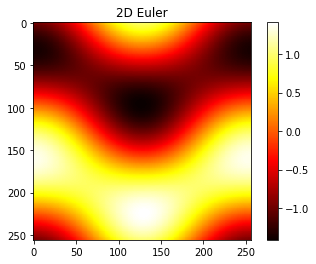

Time: 0.03s


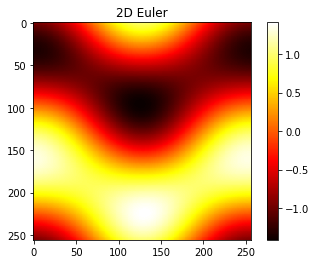

Time: 0.04s


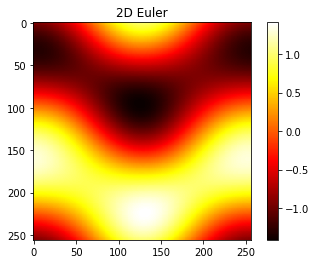

Time: 0.05s


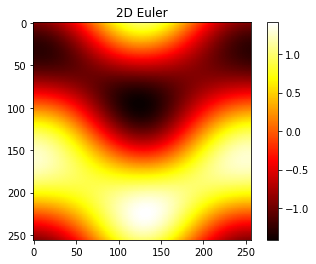

Time: 0.06s


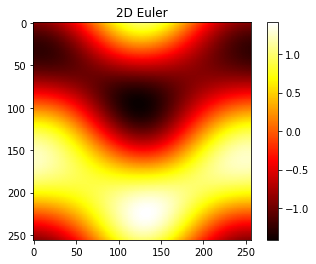

Time: 0.07s


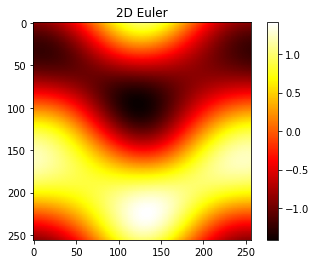

Time: 0.08s


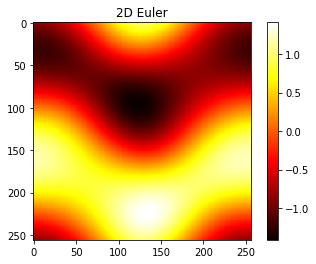

Time: 0.09s


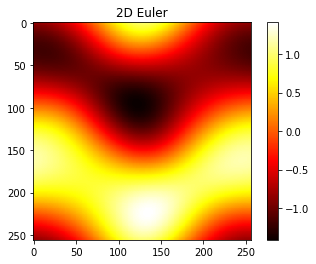

Time: 0.1s


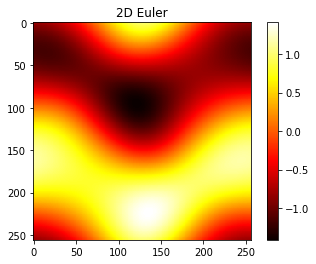

Time: 0.11s


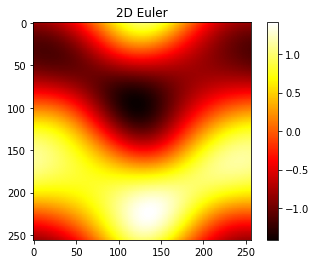

Time: 0.12s


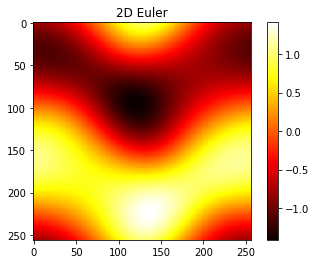

Time: 0.13s


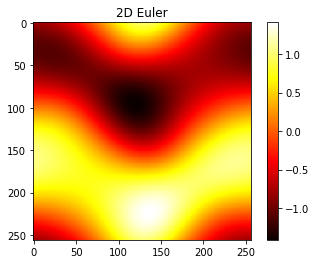

Time: 0.14s


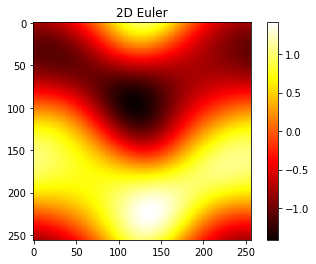

Time: 0.15s


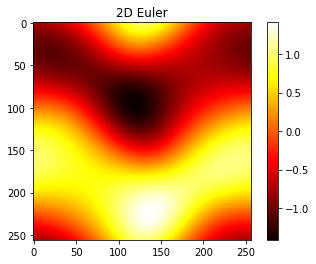

Time: 0.16s


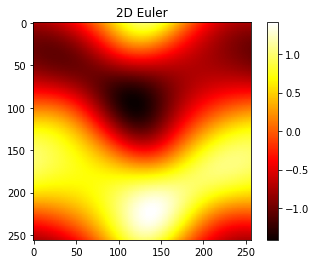

Time: 0.17s


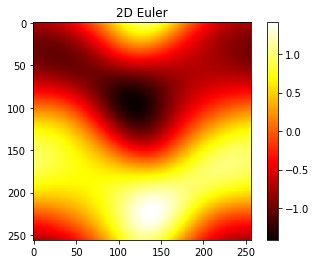

Time: 0.18s


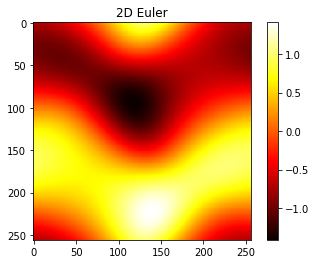

Time: 0.19s


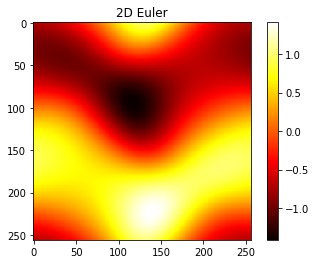

Time: 0.2s


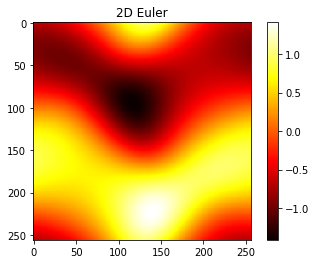

Time: 0.21s


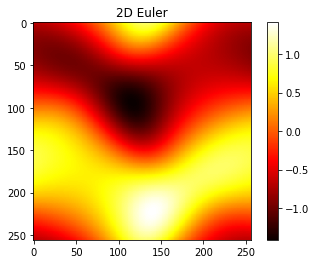

Time: 0.22s


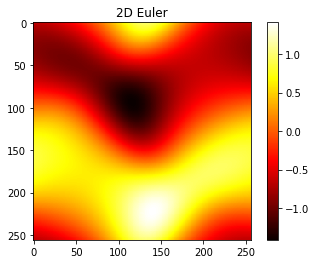

Time: 0.23s


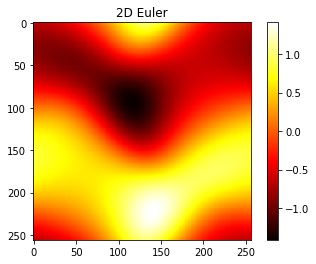

Time: 0.24s


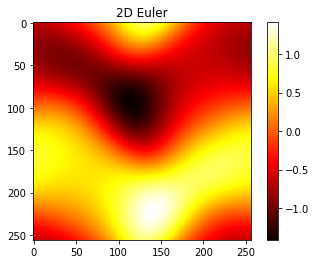

Time: 0.25s


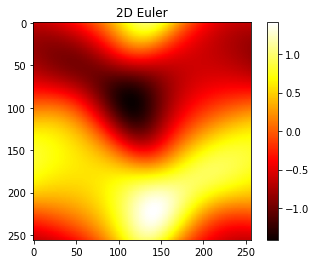

Time: 0.26s


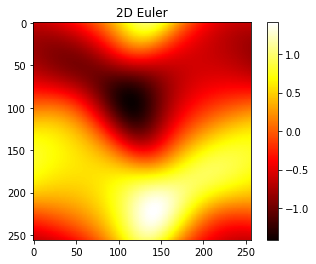

Time: 0.27s


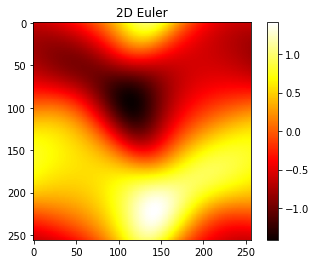

Time: 0.28s


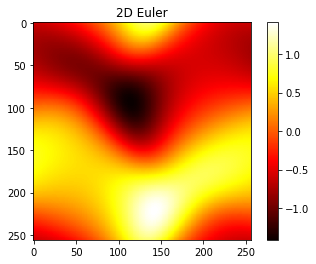

Time: 0.29s


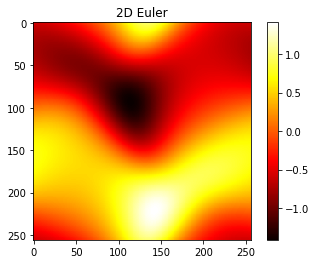

Time: 0.3s


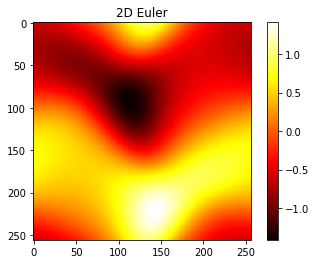

Time: 0.31s


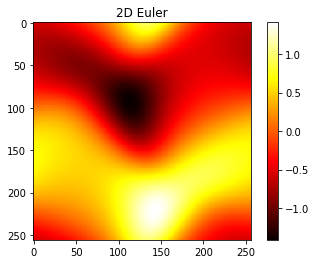

Time: 0.32s


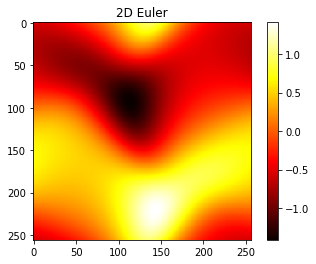

Time: 0.33s


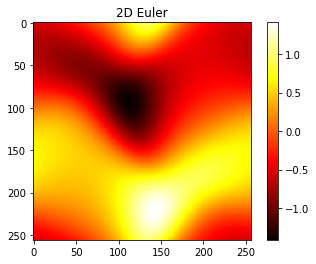

Time: 0.34s


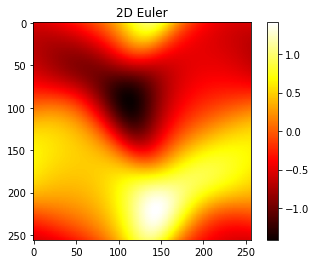

Time: 0.35s


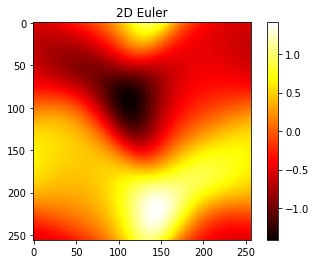

Time: 0.36s


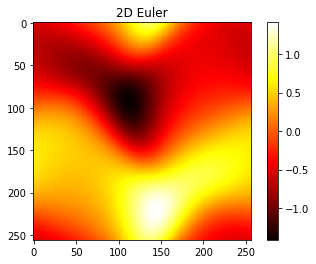

Time: 0.37s


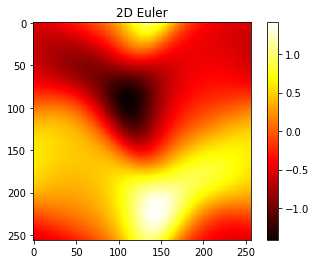

Time: 0.38s


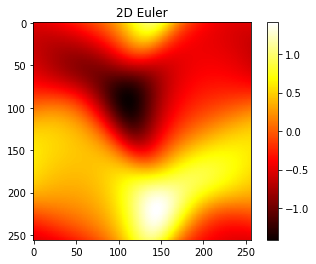

Time: 0.39s


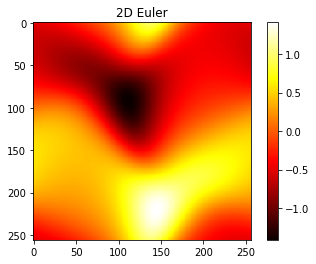

Time: 0.4s


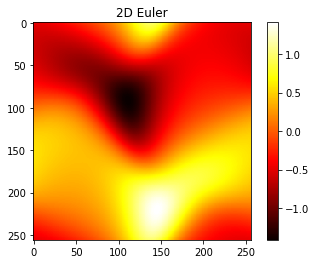

Time: 0.41s


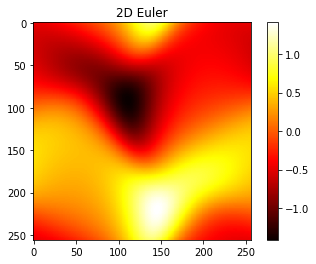

Time: 0.42s


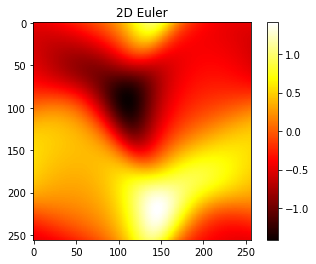

Time: 0.43s


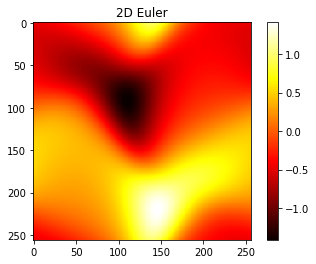

Time: 0.44s


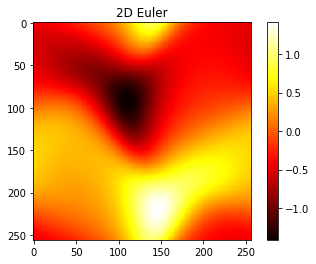

Time: 0.45s


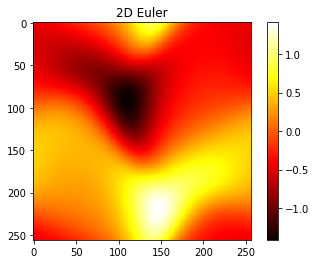

Time: 0.46s


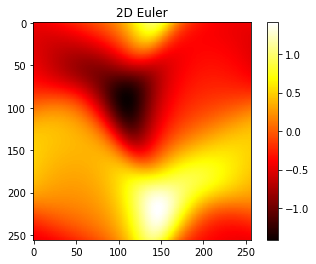

Time: 0.47s


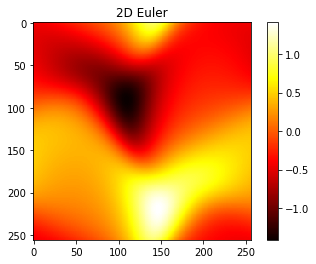

Time: 0.48s


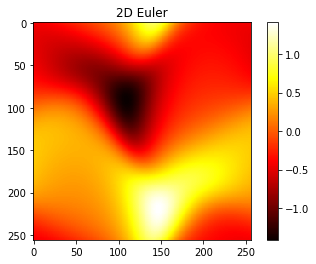

Time: 0.49s


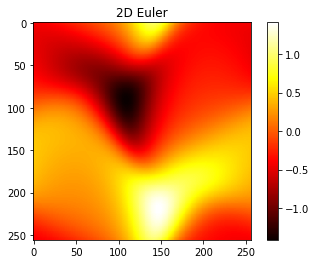

Time: 0.5s


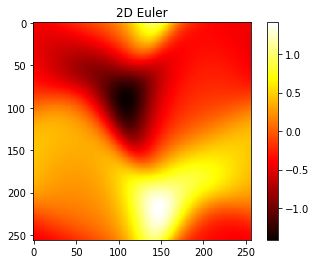

Time: 0.51s


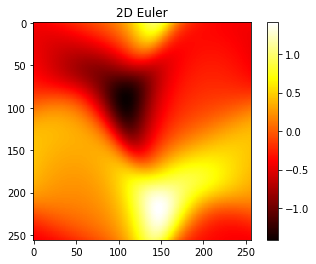

Time: 0.52s


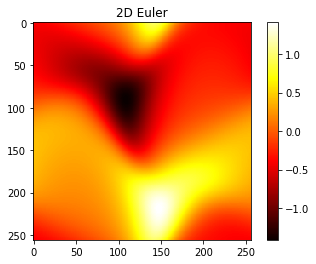

Time: 0.53s


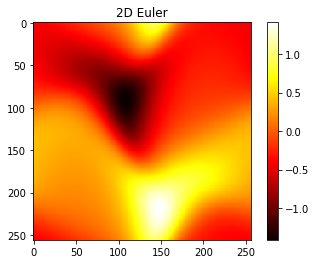

Time: 0.54s


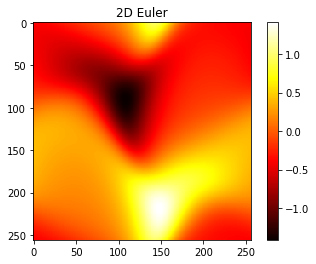

Time: 0.55s


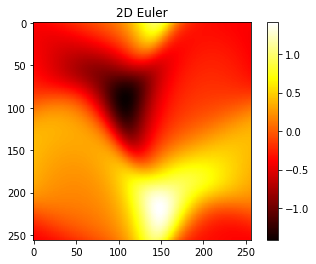

Time: 0.56s


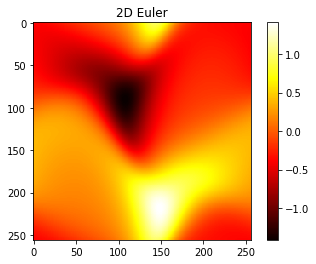

Time: 0.57s


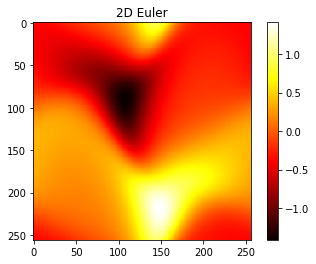

Time: 0.58s


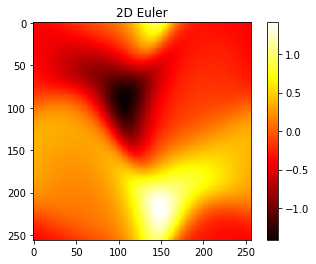

Time: 0.59s


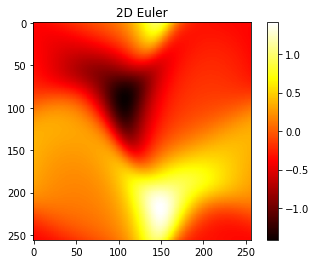

Time: 0.6s


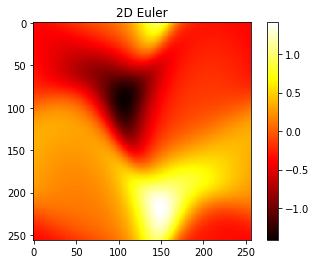

Time: 0.61s


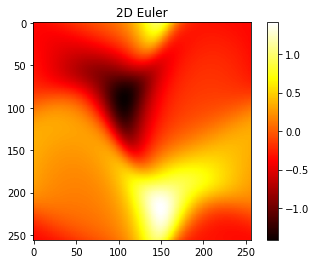

Time: 0.62s


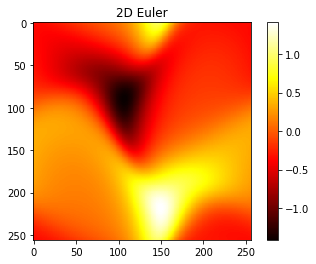

Time: 0.63s


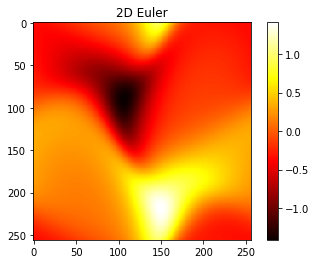

Time: 0.64s


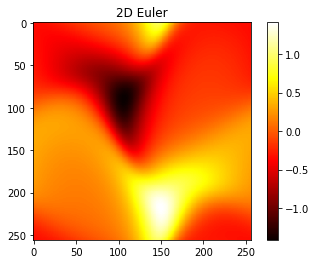

Time: 0.65s


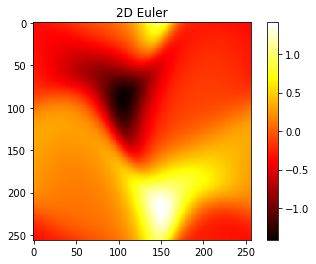

Time: 0.66s


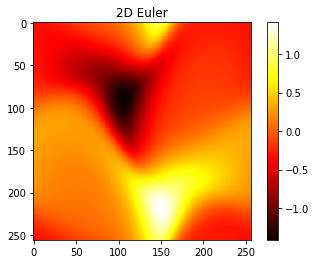

Time: 0.67s


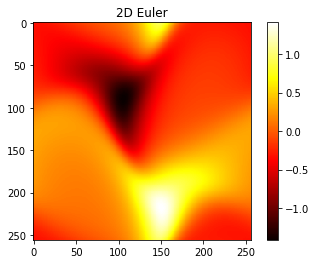

Time: 0.68s


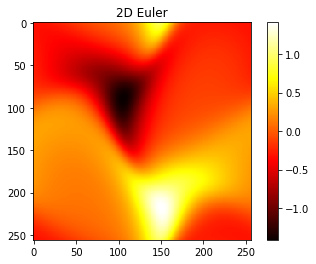

Time: 0.69s


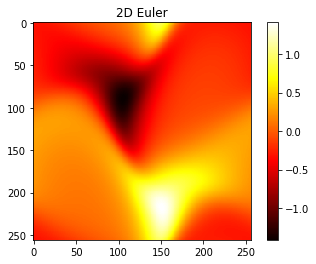

Time: 0.7s


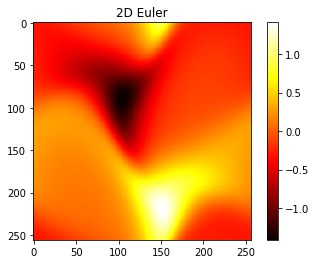

Time: 0.71s


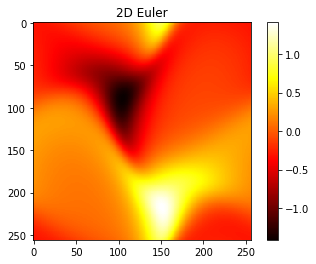

Time: 0.72s


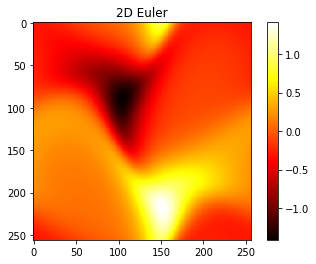

Time: 0.73s


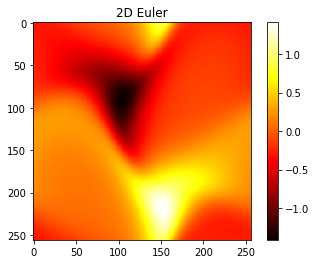

Time: 0.74s


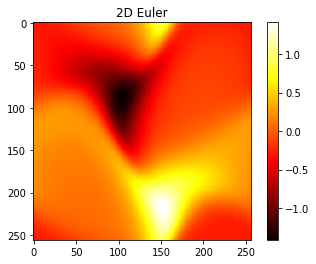

Time: 0.75s


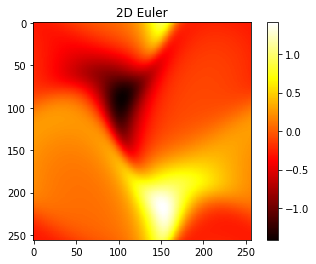

Time: 0.76s


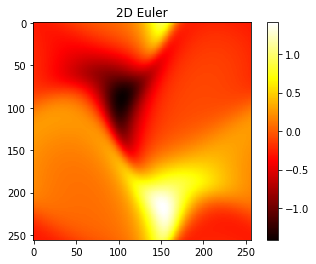

Time: 0.77s


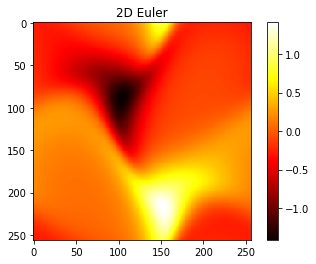

Time: 0.78s


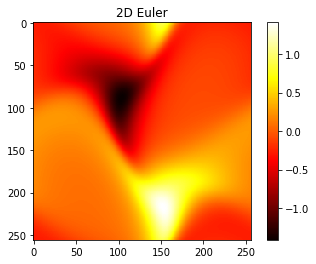

Time: 0.79s


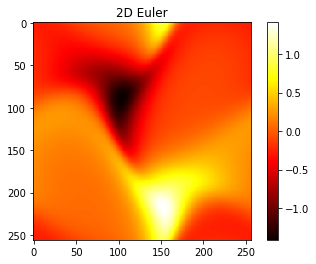

Time: 0.8s


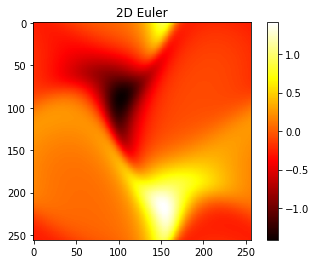

Time: 0.81s


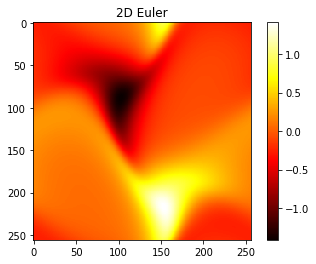

Time: 0.82s


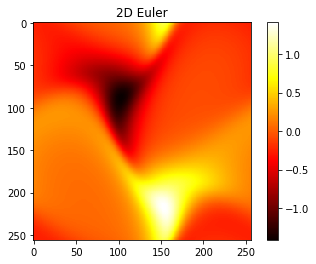

Time: 0.83s


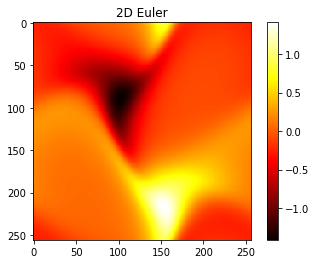

Time: 0.84s


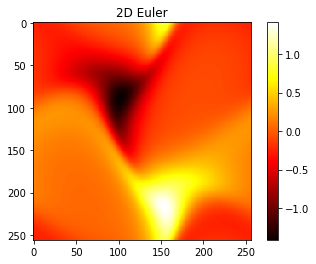

Time: 0.85s


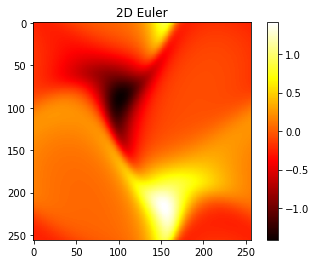

Time: 0.86s


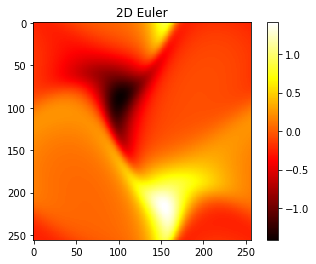

Time: 0.87s


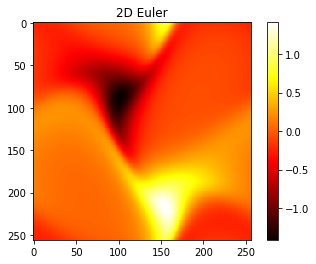

Time: 0.88s


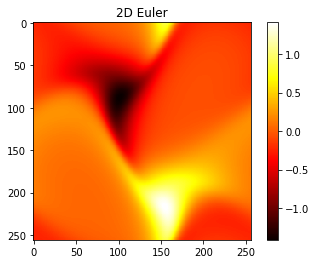

Time: 0.89s


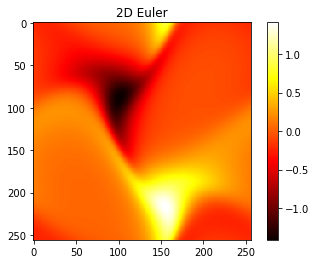

Time: 0.9s


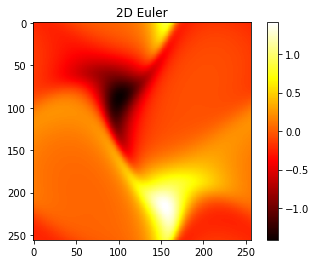

Time: 0.91s


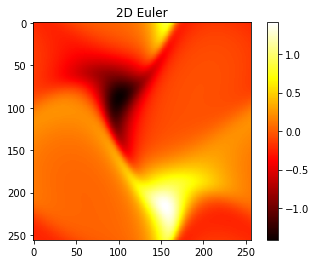

Time: 0.92s


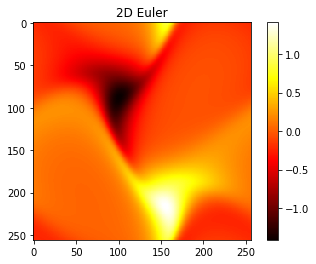

Time: 0.93s


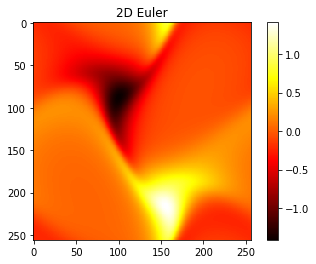

Time: 0.94s


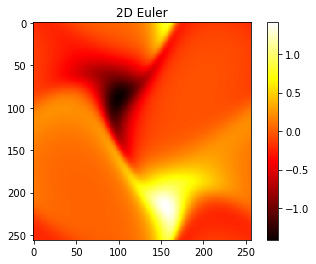

Time: 0.95s


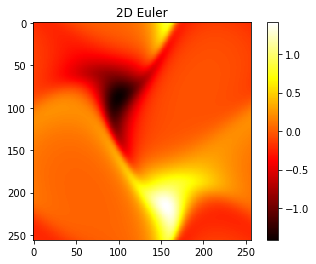

Time: 0.96s


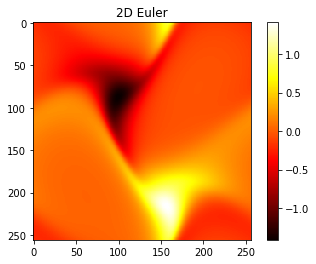

Time: 0.97s


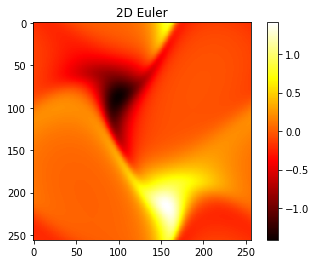

Time: 0.98s


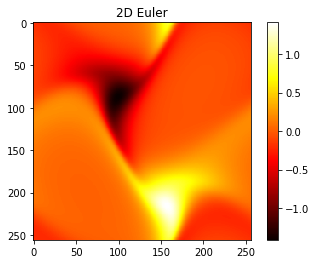

Time: 0.99s


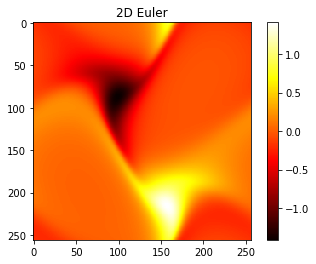

Time: 1.0s


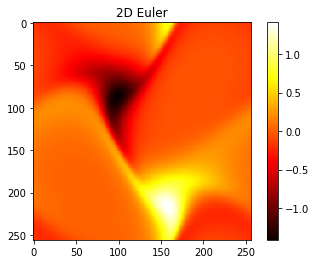

Time: 1.01s


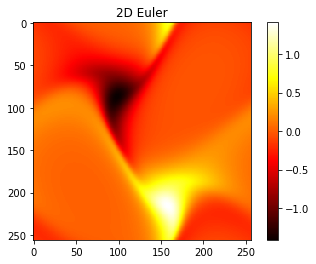

Time: 1.02s


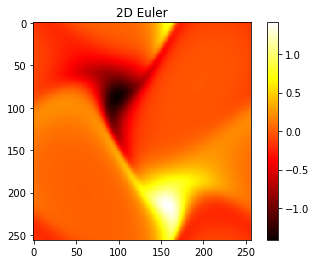

Time: 1.03s


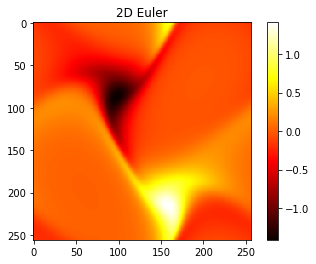

Time: 1.04s


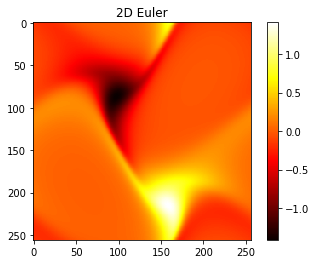

Time: 1.05s


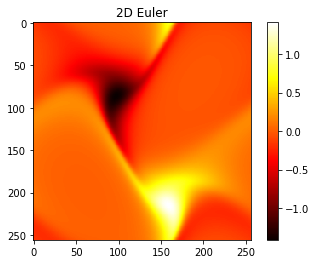

Time: 1.06s


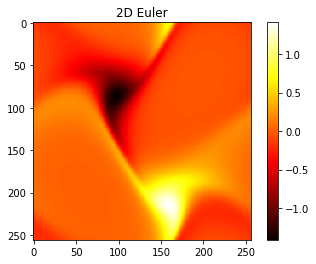

Time: 1.07s


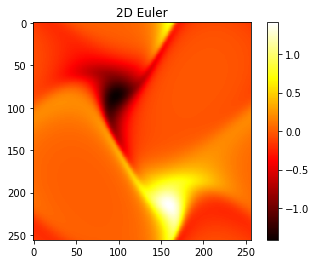

Time: 1.08s


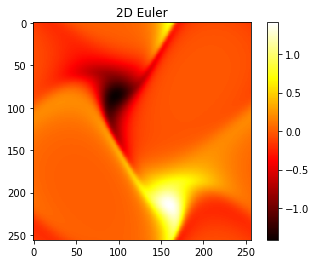

Time: 1.09s


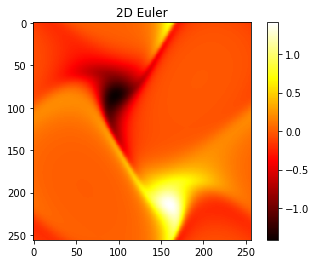

Time: 1.1s


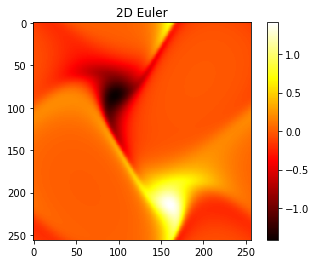

Time: 1.11s


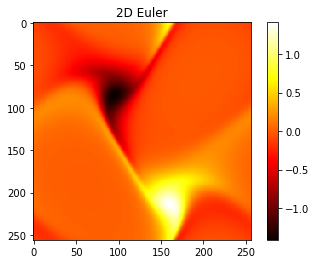

Time: 1.12s


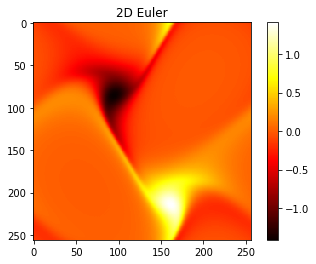

Time: 1.13s


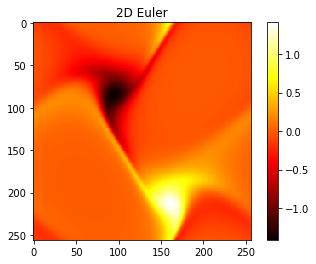

Time: 1.14s


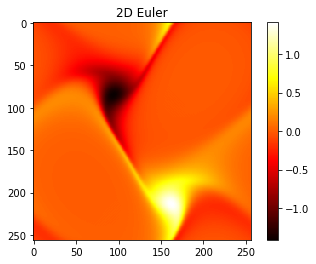

Time: 1.15s


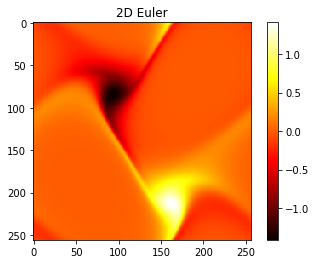

Time: 1.16s


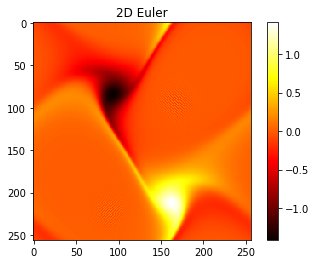

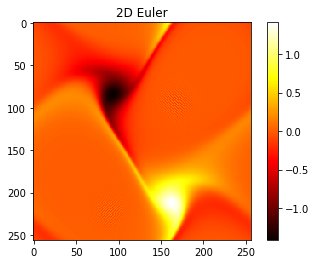

In [85]:
X, Y = np.meshgrid(xx, yy)
w = -np.sin(X) - np.cos(X)*np.cos(Y)
g = np.sin(X)*np.sin(Y) - np.cos(Y)

w_hat = np.fft.fftshift(np.fft.fft2(w))
g_hat = np.fft.fftshift(np.fft.fft2(g))


for iteration_time in range(0, n_timesteps):
    if np.mod(iteration_time, 10)==0:
        seconds = np.round(iteration_time*dt,4)
        print(f"Time: {seconds}s")
        plt.imshow(w.T, cmap='hot')
        #plt.pcolormesh(xx, yy, w.T, cmap='hot')
        if iteration_time==0:
            plt.colorbar()          
        plt.title("2D Euler")
        plt.show(False)
        plt.savefig("Euler_images/vorticity_{0}".format(int(iteration_time/10)))
    
    u_hat = 1j*(np.multiply(kx,g_hat)+np.multiply(ky,w_hat))/k2
    v_hat = 1j*(np.multiply(ky,g_hat)-np.multiply(kx,w_hat))/k2
    
    u_hat[int(Ny/2),int(Nx/2)]=0
    v_hat[int(Ny/2),int(Nx/2)]=0
    
    u = np.real(np.fft.ifft2(np.fft.ifftshift(u_hat)))
    v = np.real(np.fft.ifft2(np.fft.ifftshift(v_hat)))
    
    avg_g2 = 1/(2*np.pi)**2 * (np.sum(g**2))*dx*dy
    
    wx = np.real(np.fft.ifft2(np.fft.ifftshift(1j*np.multiply(kx,w_hat))))
    wy = np.real(np.fft.ifft2(np.fft.ifftshift(1j*np.multiply(ky,w_hat))))
    gx = np.real(np.fft.ifft2(np.fft.ifftshift(1j*np.multiply(kx,g_hat))))
    gy = np.real(np.fft.ifft2(np.fft.ifftshift(1j*np.multiply(ky,g_hat))))
    
    w = dt*(np.multiply(g,w) - np.multiply(u,wx)-np.multiply(v,wy)) + w
    g = dt*(2*avg_g2 - np.power(g,2) - np.multiply(u,gx)-np.multiply(v,gy)) + g
    
    w_hat = np.multiply(np.fft.fftshift(np.fft.fft2(w)),dealias)
    g_hat = np.multiply(np.fft.fftshift(np.fft.fft2(g)),dealias)